tidyish code for doing yearly output of OmA_depth

In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [2]:
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
import matplotlib.patches as patches

import netCDF4 as nc
import cmocean as cm
import numpy as np
from salishsea_tools import (
    viz_tools,
)
import sys
sys.path.append('/data/tjarniko/mocsy')
import mocsy

sys.path.append('/data/tjarniko/mocsy')
import arrow
sys.path.append('/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/BASE_RUN/CLEAN/CCCma_src')
import mocsy
import CCCma
import CCCma_stations as cs
import CCCma_fwk as Cfwk
from matplotlib import reload
import arrow

%matplotlib inline

/home/tjarniko/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [4]:

td = '01jan15'
tdir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/BASE_RUN/CLEAN/pngs/'
w = nc.Dataset(f'{tdir}/BR2015_{td}_prof.nc')

dp = [0,18,23,26]
# for i in range(0,len(dp)):
#     print('At depth level ', str(dp[i]), ' depth is ', str(w['Profiles']['depth'][dp[i]]))

In [6]:
start = '2015-01-01'
end = '2015-12-31'

start_run = arrow.get(start)
end_run = arrow.get(end)

arrow_array = []
for r in arrow.Arrow.span_range('day', start_run, end_run):
    arrow_array.append(r)
    
date_array = []
for i in range(0,len(arrow_array)):    
    q = arrow_array[i][0]
    ddmmmyy = q.format('DDMMMYY').lower()    
    date_array.append(ddmmmyy)


In [7]:
OmA_dict_BR = {'OmA_sathor' : np.zeros([12,365])}
OmA_dict_PI = {'OmA_sathor' : np.zeros([12,365])}

for d in range(0,len(date_array)):
    td = date_array[d]
    tdir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/BASE_RUN/CLEAN/pngs/'
    w = nc.Dataset(f'{tdir}/BR2015_{td}_prof.nc')
    if d%60 == 0:
        print(td)
    
    sa = w['Profiles']['OmA_prof']
    sd = w['Profiles']['depth']
    for s in range(0,12):
        t_prof = sa[s,:]
        fu, du = find_depth(sd,t_prof) 
        OmA_dict_BR['OmA_sathor'][s,d] = du
        
for d in range(0,len(date_array)):
    td = date_array[d]
    tdir = '/data/tjarniko/MEOPAR/analysis-tereza/notebooks/carbon_dev/BASE_RUN/CLEAN/pngs/'
    w = nc.Dataset(f'{tdir}/PI2015_{td}_prof.nc')
    if d%60 == 0:
        print(td)
    
    sa = w['Profiles']['OmA_prof']
    sd = w['Profiles']['depth']
    for s in range(0,12):
        t_prof = sa[s,:]
        fu, du = find_depth(sd,t_prof) 
        OmA_dict_PI['OmA_sathor'][s,d] = du

01jan15


/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in less
/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in greater_equal


02mar15
01may15
30jun15
29aug15
28oct15
27dec15
01jan15
02mar15
01may15
30jun15
29aug15
28oct15
27dec15


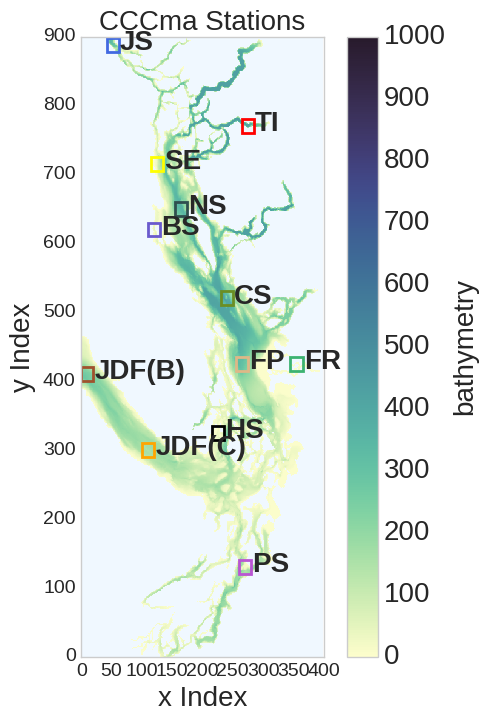

In [8]:
bath = nc.Dataset('/home/sallen/MEOPAR/grid/bathymetry_201702.nc')
bath1 = bath.variables['Bathymetry']

CCCma.one_panel_plot(bath1, cs.STATIONS, 'CCCma Stations', \
               cm.cm.deep,12*.5,16*.5,0,1000,'bathymetry','')

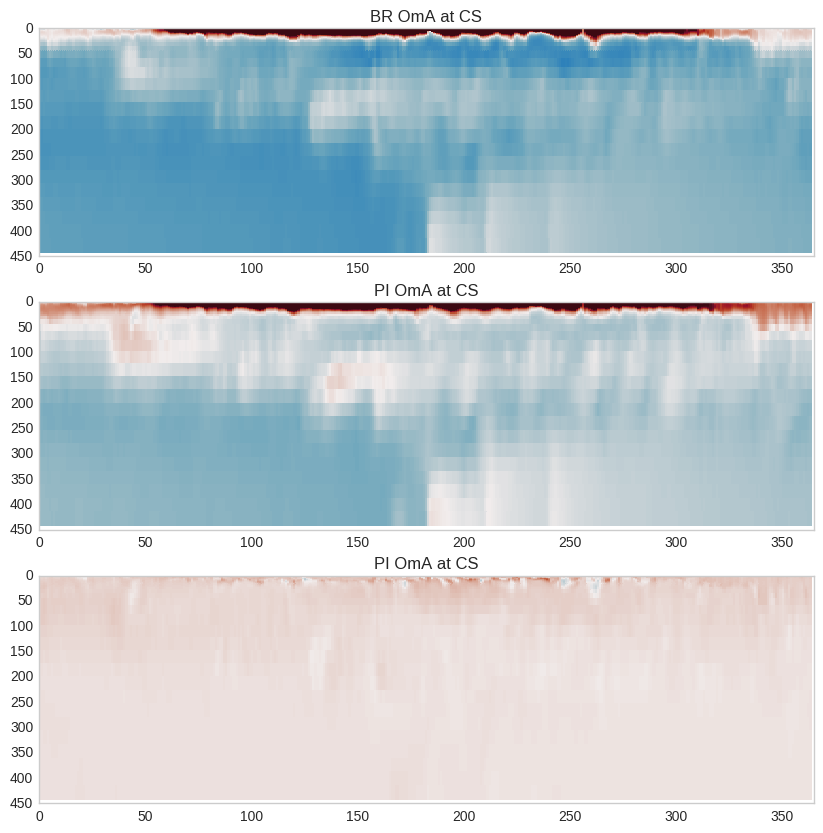

In [13]:
zlevels = PI['Profiles']['depth'][:]
fig = plt.figure(figsize=(10,10))

for i in range(1,4):
    ax = fig.add_subplot(3,1,i)
    dst = 0 
    den = 365
    section_slice = np.arange(dst, den)
    if i == 1:
        ax.invert_yaxis()
        tplt = OmA_prof_dict_BR['OmA'][7,0:40,dst:den][:]
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=0.5, vmax=1.5 )
        ax.set_title('BR OmA at CS')
        ax.set_xlim([0,365])
    if i == 2:
        ax.invert_yaxis()
        tplt = OmA_prof_dict_PI['OmA'][7,0:40,dst:den][:]
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=0.5, vmax=1.5 )
        ax.set_title('PI OmA at CS')
        ax.set_xlim([0,365])
    if i == 3:
        ax.invert_yaxis()
        tplt = OmA_prof_dict_PI['OmA'][7,0:40,dst:den][:] - OmA_prof_dict_BR['OmA'][7,0:40,dst:den][:] 
        tcmap = cm.cm.balance
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-1.5, vmax=1.5 )
        ax.set_title('PI OmA at CS')
        ax.set_xlim([0,365])

/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:12: RuntimeWarning: invalid value encountered in greater_equal
/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in less
/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:22: RuntimeWarning: invalid value encountered in greater_equal
/home/tjarniko/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in less


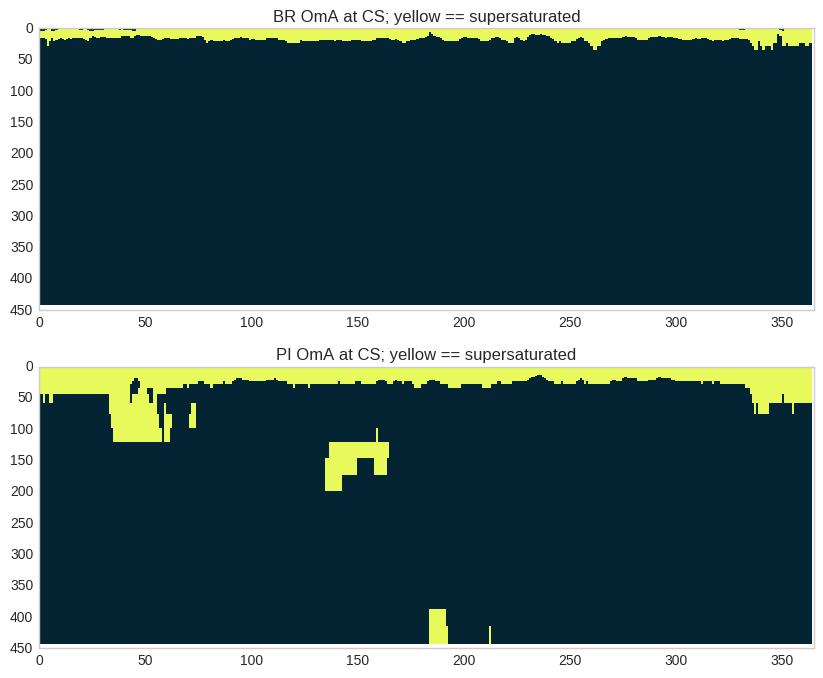

In [14]:
zlevels = PI['Profiles']['depth'][:]
fig = plt.figure(figsize=(10,8))

for i in range(1,3):
    ax = fig.add_subplot(2,1,i)
    dst = 0 
    den = 365
    section_slice = np.arange(dst, den)
    if i == 1:
        ax.invert_yaxis()
        tplt = OmA_prof_dict_BR['OmA'][7,0:40,dst:den][:]
        tplt[tplt>=1] = 1
        tplt[tplt<1] = -1
        tcmap = cm.cm.thermal
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-1, vmax=1  )
        ax.set_title('BR OmA at CS; yellow == supersaturated')
        ax.set_xlim([0,365])
    if i == 2:
        ax.invert_yaxis()
        tplt = OmA_prof_dict_PI['OmA'][7,0:40,dst:den][:]
        tplt[tplt>=1] = 1
        tplt[tplt<1] = -1
        tcmap = cm.cm.thermal
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-1, vmax=1 )
        ax.set_title('PI OmA at CS; yellow == supersaturated')
        ax.set_xlim([0,365])


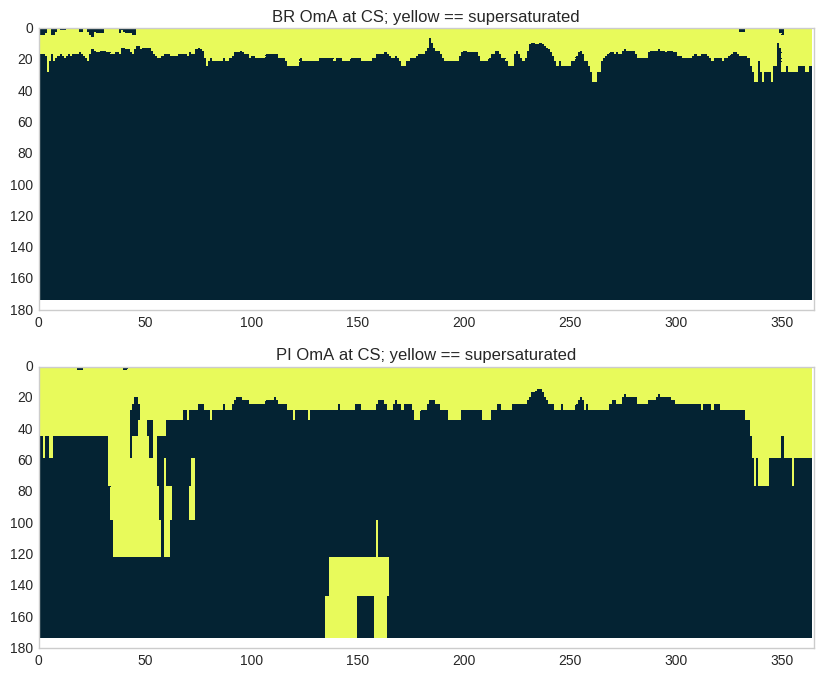

In [15]:
dp = 30 
zlevels = PI['Profiles']['depth'][0:dp]
fig = plt.figure(figsize=(10,8))

for i in range(1,3):
    ax = fig.add_subplot(2,1,i)
    dst = 0 
    den = 365
    section_slice = np.arange(dst, den)
    if i == 1:
        ax.invert_yaxis()
        tplt = OmA_prof_dict_BR['OmA'][7,0:dp,dst:den][:]
        tplt[tplt>=1] = 1
        tplt[tplt<1] = -1
        tcmap = cm.cm.thermal
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-1, vmax=1  )
        ax.set_title('BR OmA at CS; yellow == supersaturated')
        ax.set_xlim([0,365])
    if i == 2:
        ax.invert_yaxis()
        tplt = OmA_prof_dict_PI['OmA'][7,0:dp,dst:den][:]
        tplt[tplt>=1] = 1
        tplt[tplt<1] = -1
        tcmap = cm.cm.thermal
        cmap = tcmap
        mesh = ax.pcolormesh(section_slice[:],zlevels[:],tplt, cmap = tcmap, vmin=-1, vmax=1 )
        ax.set_title('PI OmA at CS; yellow == supersaturated')
        ax.set_xlim([0,365])
